In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


name, ticket no. all seems irrelevant so drop them

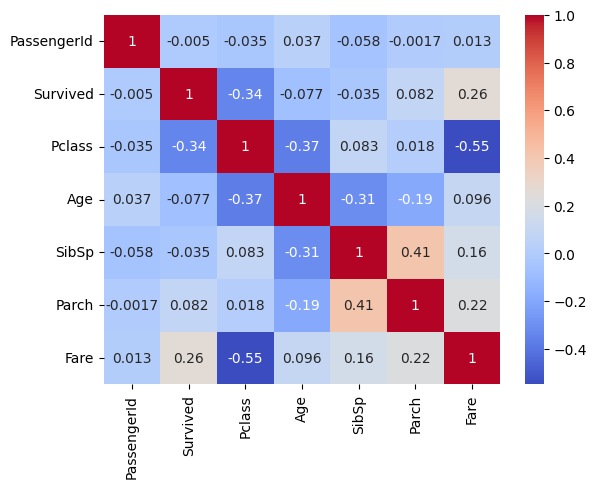

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming titanic_data is DataFrame
# Select only numerical features for correlation calculation
numerical_features = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix on numerical features only
correlation_matrix = numerical_features.corr()

# Generate the heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

everything that is negatively correlated is same important is positively correlated ,
but not zero!!
1 means -  higher this value gets higher other value gets
-1 means - higher this value gets lower other value gets

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
  strat_train_set = titanic_data.loc[train_indices]
  strat_test_set = titanic_data.loc[test_indices]


In [8]:
# strat_test_set

<Axes: >

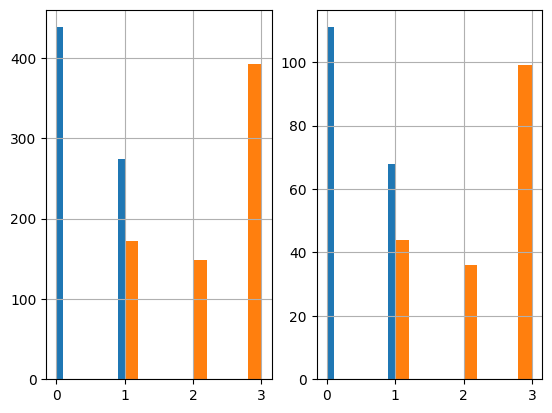

In [9]:
# in order to see that distribution make sense plot , we're going to do a plot
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

In [10]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 785 to 866
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [11]:
#dropping unneccessary features


# strat_train_set = strat_train_set.drop(["Age", "Cabin"],axis=1)
# strat_test_set = strat_test_set.drop(["Age", "Cabin"],axis=1)
# strat_train_set.info()

#but we'll use ESTIMATORS this time


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer # to fill missing values
# BaseEstimator -
  # -These methods allow you to get and set the parameters of an estimator.
  # -This is useful for hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV

# TransformerMixin -
  # -This method combines fit and transform into a single call.

  # -If you implement fit and transform in your custom transformer, you automatically get fit_transform for free by inheriting from TransformerMixin

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self #becoz we do not have to do any fitting here

  def transform(self, X):
    imputer = SimpleImputer(strategy = "mean")
    X['Age'] = imputer.fit_transform(X[['Age']]) # Corrected the column selection
    return X


In [13]:
from  sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def __init__(self):
    # Initialize the OneHotEncoder here to ensure it's fit only once
    self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

  def fit(self, X, y=None):
    # Fit the OneHotEncoder during the fit method
    X_encoded = X.copy()  # Create a copy to avoid modifying the original DataFrame

    # Handle missing values in 'Embarked' before one-hot encoding
    imputer = SimpleImputer(strategy="most_frequent")
    X_encoded['Embarked'] = imputer.fit_transform(X_encoded[['Embarked']]).ravel()

    # Fit the encoder on both 'Embarked' and 'Sex'
    self.encoder.fit(X_encoded[['Embarked', 'Sex']])
    return self

  def transform(self, X):
    # Create a copy of the input DataFrame to avoid modifying the original DataFrame
    X = X.copy()

    # Handle missing values in 'Embarked' before one-hot encoding
    imputer = SimpleImputer(strategy="most_frequent")
    X['Embarked'] = imputer.fit_transform(X[['Embarked']]).ravel()

    # One-hot encode 'Embarked' and 'Sex' using the fitted encoder
    encoded_features = self.encoder.transform(X[['Embarked', 'Sex']])

    # Create column names for the encoded features
    feature_names = [f"{col}_{val}" for col, vals in zip(['Embarked', 'Sex'], self.encoder.categories_) for val in vals]

    # Create a DataFrame for encoded features
    encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=X.index)

    # Concatenate encoded features with original DataFrame
    X = pd.concat([X, encoded_df], axis=1)
    return X

In [14]:
#drop some unimporant features:
class FeatureDropper(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore")

In [15]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),  # FeatureEncoder is placed before FeatureDropper
                    ("featuredropper", FeatureDropper())]) # FeatureDropper is placed after FeatureEncoder

In [16]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 785 to 866
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_C   712 non-null    float64
 8   Embarked_Q   712 non-null    float64
 9   Embarked_S   712 non-null    float64
 10  Sex_female   712 non-null    float64
 11  Sex_male     712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [18]:
#now we're going to use the data that we got from pipeline, going to scale it and then start WITH ACTUAL TRAINING:

In [19]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis = 1) #This line creates the feature matrix X by removing the "Survived" column from the strat_train_set
y = strat_train_set["Survived"] #This line creates the target vector y by selecting only the "Survived" column from the strat_train_set DataFrame.

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()
#These lines scale the features (X) using StandardScaler and convert the target (y) to a NumPy array, preparing the data for machine learning.

What kind of model we choose now and what kind of algorithm completely depends on us
- can go with KNN, Support vector classification

In [20]:
#will use RANDOM FOREST here.....can also use neural network(but i do not for currently how to use it)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [22]:
final_clf = grid_search.best_estimator_

In [23]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [24]:
strat_test_set = pipeline.fit_transform(strat_test_set)
#strat_test_set is the pipeline we define

In [25]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
557,558,0,1,30.463504,0,0,227.5250,1.0,0.0,0.0,0.0,1.0
221,222,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
450,451,0,2,36.000000,1,2,27.7500,0.0,0.0,1.0,0.0,1.0
756,757,0,3,28.000000,0,0,7.7958,0.0,0.0,1.0,0.0,1.0
323,324,1,2,22.000000,1,1,29.0000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
701,702,1,1,35.000000,0,0,26.2875,0.0,0.0,1.0,0.0,1.0
267,268,1,3,25.000000,1,0,7.7750,0.0,0.0,1.0,0.0,1.0
322,323,1,2,30.000000,0,0,12.3500,0.0,1.0,0.0,1.0,0.0
702,703,0,3,18.000000,0,1,14.4542,1.0,0.0,0.0,1.0,0.0


In [26]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [27]:
final_clf.score(X_data_test, y_data_test)

0.8212290502793296

In [28]:
# got 0.821222 means nearly 82% accuracy

now we need to take findings, here so we can see okay this worked if get that score with actual data it would be nice

In [29]:
#titanic_data still has old format: useless features, no onehotencodedfeature,so

final_data = pipeline.fit_transform(titanic_data)

In [30]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [31]:
X_final = final_data.drop(['Survived'], axis = 1)
y_final = final_data['Survived']

scaler = StandardScaler()

X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

#done, now gonna run GridSearch on this whole thing

In [32]:
prod_clf = RandomForestClassifier() #it means production classifier

param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf = grid_search.best_estimator_

In [34]:
prod_final_clf

RandomForestClassifier(min_samples_split=4)

#now we're actually going to make predictions on test data.

In [35]:
titanic_test_data = pd.read_csv("test.csv")

In [36]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [37]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [38]:
final_test_data.info()
#after this we came to know that we've a "null-value", so in order to counteract that we're going :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked_C   418 non-null    float64
 7   Embarked_Q   418 non-null    float64
 8   Embarked_S   418 non-null    float64
 9   Sex_female   418 non-null    float64
 10  Sex_male     418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [39]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

<ipython-input-39-357905f78e0f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method='ffill')


In [40]:
predictions = prod_final_clf.predict(X_data_final_test)

In [41]:
# predictions

In [42]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index = False)

In [43]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
#evaluating model

In [45]:
from sklearn.metrics import mean_squared_error
check = prod_final_clf.predict(X_data_test)

mse = mean_squared_error(y_data_test, check)
rmse = np.sqrt(mse)

In [46]:
mse


0.0893854748603352

In [47]:
# using cross-validation:

In [48]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(prod_final_clf, X_data_final, y_data_final, scoring = "neg_mean_squared_error", cv=10)

In [49]:
score

array([-0.2       , -0.17977528, -0.24719101, -0.17977528, -0.08988764,
       -0.17977528, -0.17977528, -0.23595506, -0.13483146, -0.19101124])

In [50]:
import numpy as np

mean_score = np.mean(score)
std_score = np.std(score)

print(f"Mean MSE: {mean_score}")
print(f"Standard Deviation of MSE: {std_score}")

Mean MSE: -0.18179775280898874
Standard Deviation of MSE: 0.04277284740571437
